In [6]:
import optuna
import numpy as np  
import optuna.visualization as vis
import os
import plotly
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.signal import butter,filtfilt,welch
from scipy import signal
import seaborn as sns



In [7]:
number_top=100

Global Trial 1:
Study: Chi30_SW_max_global_L10
Params: {'L': 15, 'P': 0.9713179958501162, 'Inh': 0.9998089895230675, 'Trest': 0.7108657200382942, 'Trelative': 1.0499478170708305, 'C_h': 0.2600259765908771, 'Tipo_red': 2}
Sum of Values: 11.756698794924691
---------------------------------------
Global Trial 2:
Study: Chi30_SW_max_global_L20
Params: {'L': 21, 'P': 0.7849450042438971, 'Inh': 0.9839435157649556, 'Trest': 0.10085509674779636, 'Trelative': 0.2930385862035446, 'C_h': 0.9960171742511755, 'Tipo_red': 1}
Sum of Values: 13.488156355769549
---------------------------------------
Global Trial 3:
Study: Chi30_SW_max_global_L10
Params: {'L': 15, 'P': 0.8968534015796196, 'Inh': 0.9820800088226507, 'Trest': 0.7392143922131986, 'Trelative': 1.0904381577673226, 'C_h': 0.25251368103521465, 'Tipo_red': 2}
Sum of Values: 17.94174343406006
---------------------------------------
Frecuencia de aparición de cada estudio en los mejores 100 ensayos:
Estudio Chi30_SW_max_global_L10: 59 veces
Estu

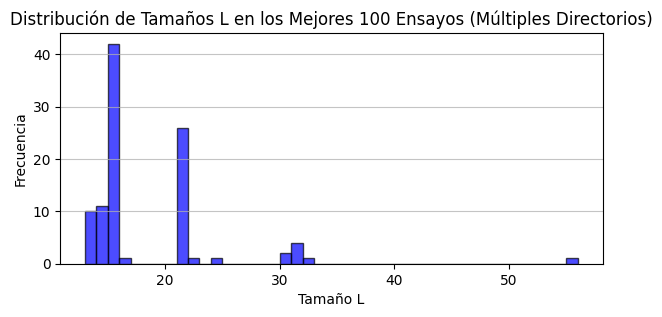

In [8]:
study_directories = ["Estudios/F"]  
storage_prefix = "sqlite:///"
all_trials_global = []
for study_directory in study_directories:
    # Listar todos los archivos en el directorio de estudios que tengan la extensión .db
    for file_name in os.listdir(study_directory):
        if file_name.endswith(".db"):  # Filtrar solo los archivos .db
            study_name = file_name.replace(".db", "")  # Obtener el nombre del estudio sin la extensión .db
            # Cargar el estudio
            study = optuna.load_study(study_name=study_name, storage=storage_prefix + os.path.join(study_directory, file_name))

            # Filtrar los ensayos válidos
            valid_trials = [t for t in study.trials if t.values is not None]

            # Agregar los ensayos válidos a la lista global
            for trial in valid_trials:
                trial.study_name = study_name  # Asignar el nombre del estudio al ensayo
                all_trials_global.append(trial)


number_top = 100  # Ajusta el número de ensayos mejores que deseas analizar
best_trials_global = sorted(all_trials_global, key=lambda t: sum(t.values))[:number_top]

# Mostrar los mejores 3 ensayos globales
for i, trial in enumerate(best_trials_global[:3]):
    print(f"Global Trial {i + 1}:")
    print("Study:", trial.study_name)
    print("Params:", trial.params)
    print("Sum of Values:", sum(trial.values))
    print("---------------------------------------")

# Análisis de frecuencias
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global]
sizes = [trial.params['L'] for trial in best_trials_global]  # Recopilar tamaños L

# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)
size_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1

for size in sizes:
    size_frequency_count[size] += 1  # Contar la frecuencia de cada tamaño L

print(f"Frecuencia de aparición de cada estudio en los mejores {number_top} ensayos:")
for study_name, count in study_frequency_count.items():
    print(f"Estudio {study_name}: {count} veces")

# Mostrar la frecuencia de cada tipo de red en los mejores ensayos
print(f"Frecuencia de cada tipo de red en los mejores {number_top} ensayos:")
for network_type, count in network_type_frequency_count.items():
    print(f"Tipo de red {network_type}: {count} veces")

# Calcular y mostrar la media del tamaño L
mean_size = np.mean(sizes)
print(f"\nMedia del tamaño L en los mejores {number_top} ensayos: {mean_size}")

# Graficar la distribución de los tamaños L
plt.figure(figsize=(7, 3))
plt.hist(sizes, bins=range(min(sizes), max(sizes) + 1), alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribución de Tamaños L en los Mejores {number_top} Ensayos (Múltiples Directorios)')
plt.xlabel('Tamaño L')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global]
sizes = [trial.params['L'] for trial in best_trials_global]  # Recopilar tamaños L
trest_values = [trial.params['Trest'] for trial in best_trials_global]  # Recopilar Trest
trela_values = [trial.params['Trelative'] for trial in best_trials_global]  # Recopilar Trest
Chiper=[trial.params['C_h'] for trial in best_trials_global]  # Recopilar Trest

P_values = [trial.params['P'] for trial in best_trials_global]  # Recopilar P
Inh_values = [trial.params['Inh'] for trial in best_trials_global]  # Recopilar P
# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1
print(f"\nMedia del L: {np.mean(sizes)}")
print(f"Desviación estándar del L: {np.std(sizes)}")
print(f"Mediana del L: { np.median(sizes)}")
print(f"Primer cuartil (Q1) del L: {np.percentile(sizes, 25)}")
print(f"Tercer cuartil (Q3) del L: {np.percentile(sizes, 75)}")


print(f"\nMedia del Trest: {np.mean(trest_values)}")
print(f"Desviación estándar del Trest: {np.std(trest_values)}")
print(f"Mediana del Trest: {np.median(trest_values)}")
print(f"Primer cuartil (Q1) del Trest: {np.percentile(trest_values, 25)}")
print(f"Tercer cuartil (Q3) del Trest: {np.percentile(trest_values, 75)}")

print(f"\nMedia del Trela: {np.mean(trela_values)}")
print(f"Desviación estándar del Trela: {np.std(trela_values)}")
print(f"Mediana del Trela: {np.median(trela_values)}")
print(f"Primer cuartil (Q1) del Trela: {np.percentile(trela_values, 25)}")
print(f"Tercer cuartil (Q3) del Trela: {np.percentile(trela_values, 75)}")

print(f"\nMedia del P: {np.mean(P_values)}")
print(f"Desviación estándar del P: {np.std(P_values)}")
print(f"Mediana del P: { np.median(P_values)}")
print(f"Primer cuartil (Q1) del P: {np.percentile(P_values, 25)}")
print(f"Tercer cuartil (Q3) del P: {np.percentile(P_values, 75)}")

print(f"\nMedia del Inh: {np.mean(Inh_values)}")
print(f"Desviación estándar del Inh: {np.std(Inh_values)}")
print(f"Mediana del Inh: { np.median(Inh_values)}")
print(f"Primer cuartil (Q1) del Inh: {np.percentile(Inh_values, 25)}")
print(f"Tercer cuartil (Q3) del Inh: {np.percentile(Inh_values, 75)}")

print(f"\nMedia del C hiper: {np.mean(Chiper)}")
print(f"Desviación estándar del C hiper: {np.std(Chiper)}")
print(f"Mediana del C hiper: { np.median(Inh_values)}")
print(f"Primer cuartil (Q1) del C hiper: {np.percentile(Chiper, 25)}")
print(f"Tercer cuartil (Q3) del C hiperh: {np.percentile(Chiper, 75)}")


Media del L: 17.94
Desviación estándar del L: 6.080822312812635
Mediana del L: 15.0
Primer cuartil (Q1) del L: 15.0
Tercer cuartil (Q3) del L: 21.0

Media del Trest: 0.5927639073528342
Desviación estándar del Trest: 0.4096447453863935
Mediana del Trest: 0.6294748161011503
Primer cuartil (Q1) del Trest: 0.3023806681214999
Tercer cuartil (Q3) del Trest: 0.7142718321569423

Media del Trela: 0.9836211017749834
Desviación estándar del Trela: 0.7492241365170755
Mediana del Trela: 0.946219331585905
Primer cuartil (Q1) del Trela: 0.5184179864654991
Tercer cuartil (Q3) del Trela: 1.1073151159177688

Media del P: 0.8014735389602273
Desviación estándar del P: 0.2546312709943398
Mediana del P: 0.9114475480344231
Primer cuartil (Q1) del P: 0.7915044913857703
Tercer cuartil (Q3) del P: 0.9567439802212796

Media del Inh: 0.9346486493487289
Desviación estándar del Inh: 0.11670627965783853
Mediana del Inh: 0.9674798473247497
Primer cuartil (Q1) del Inh: 0.955510066491472
Tercer cuartil (Q3) del Inh: 0

/tmp/ipykernel_3896/2665362751.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(trest_values, patch_artist=True, boxprops=dict(facecolor='lightgreen'),labels=["Trest"])
/tmp/ipykernel_3896/2665362751.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(trela_values, patch_artist=True, boxprops=dict(facecolor='lightyellow'),positions=[2],labels=['T relativo'])
/tmp/ipykernel_3896/2665362751.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(P_values, patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['P'])  # Asignar etiqueta para P
/tmp/ipykernel_3896

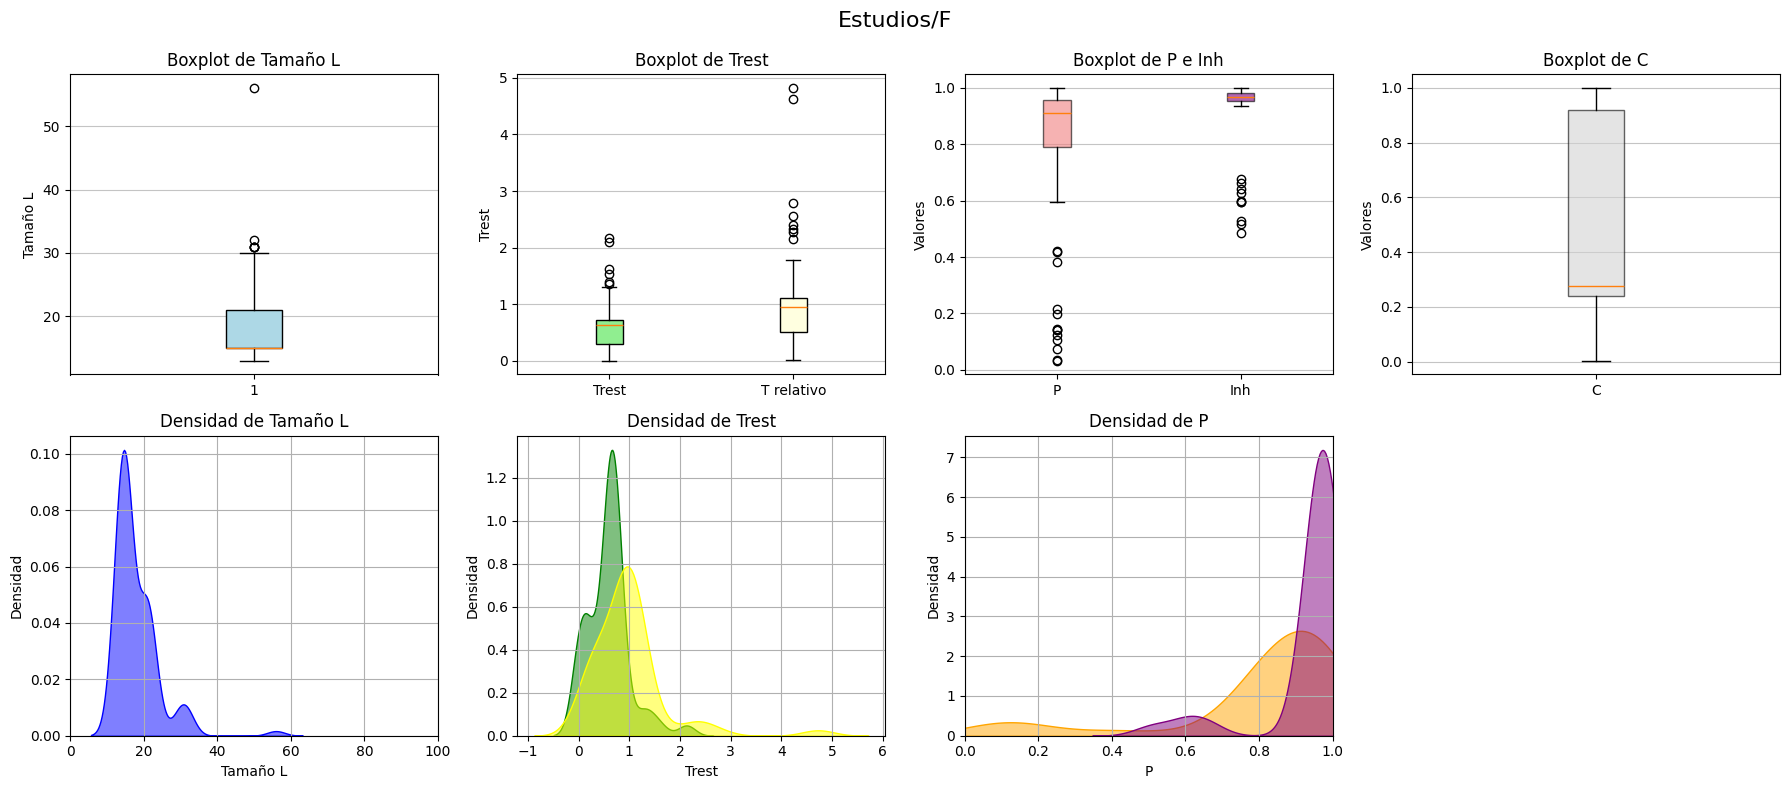

In [10]:
plt.figure(figsize=(18, 8))

# Boxplot de Tamaño L
plt.subplot(2, 4, 1)
plt.boxplot(sizes, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Tamaño L')
plt.ylabel('Tamaño L')
plt.grid(axis='y', alpha=0.75)

# Boxplot de Trest
plt.subplot(2, 4, 2)
plt.boxplot(trest_values, patch_artist=True, boxprops=dict(facecolor='lightgreen'),labels=["Trest"])
plt.boxplot(trela_values, patch_artist=True, boxprops=dict(facecolor='lightyellow'),positions=[2],labels=['T relativo'])
plt.title('Boxplot de Trest')
plt.ylabel('Trest')
plt.grid(axis='y', alpha=0.75)

# Boxplot de P
plt.subplot(2, 4, 3)
plt.boxplot(P_values, patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['P'])  # Asignar etiqueta para P
plt.boxplot(Inh_values, patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.title('Boxplot de P e Inh')
plt.ylabel('Valores')
plt.xticks([1, 2], ['P', 'Inh'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 4, 4)
plt.boxplot(Chiper, patch_artist=True, boxprops=dict(facecolor='lightgrey', alpha=0.6), labels=['C'])  # Asignar etiqueta para P
plt.title('Boxplot de C')
plt.ylabel('Valores')
plt.xticks([1], ['C'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)


plt.subplot(2, 4, 5)
sns.kdeplot(sizes, fill=True, color='blue', alpha=0.5)
plt.title('Densidad de Tamaño L')
plt.xlabel('Tamaño L')
plt.xlim(0,100)
plt.ylabel('Densidad')
plt.grid()

# Gráfico de densidad para Trest
plt.subplot(2, 4, 6)
sns.kdeplot(trest_values, fill=True, color='green', alpha=0.5)
sns.kdeplot(trela_values, fill=True, color='yellow', alpha=0.5)
plt.title('Densidad de Trest')
plt.xlabel('Trest')
plt.ylabel('Densidad')
plt.grid()

# Gráfico de densidad para P
plt.subplot(2, 4, 7)
sns.kdeplot(P_values, fill=True, color='orange', alpha=0.5)
sns.kdeplot(Inh_values, fill=True, color='purple', alpha=0.5)
plt.title('Densidad de P')
plt.xlabel('P')
plt.xlim(0,1)
plt.ylabel('Densidad')
plt.grid()

plt.tight_layout()
plt.suptitle(study_directory, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])  # Ajustar para evitar superposición con el título
plt.show()


In [11]:
# Lista de carpetas donde están almacenados los estudios
Zona="F"
carpetas_estudios = ["Estudios/F"]
output_file = f"resultados_{Zona}.txt"

# Inicializar los nombres de parámetros
param_names = []

# Buscar un archivo de ejemplo en las carpetas para extraer los nombres de parámetros
sample_study_path = None
for carpeta in carpetas_estudios:
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".db"):
            sample_study_path = os.path.join(carpeta, archivo)
            break
    if sample_study_path:
        break

if sample_study_path is None:
    raise FileNotFoundError("No se encontró ningún archivo de estudio en las carpetas especificadas.")

# Cargar un estudio de ejemplo para obtener los nombres de los parámetros
sample_study_name = os.path.basename(sample_study_path).replace(".db", "")
sample_study = optuna.load_study(study_name=sample_study_name, storage=f"sqlite:///{sample_study_path}")
param_names = list(sample_study.trials[0].params.keys())

# Crear o abrir el archivo de salida
with open(output_file, "w") as f:
    header = ["Estudio", "Ensayo", "chi2"] + param_names
    f.write("\t".join(header) + "\n")
    for carpeta_estudios in carpetas_estudios:
        for archivo in os.listdir(carpeta_estudios):
            if archivo.endswith(".db"):
                db_path = os.path.join(carpeta_estudios, archivo)
                study_name = archivo.replace(".db", "")  # Asumimos que el nombre del archivo es el nombre del estudio
                try:
                    study = optuna.load_study(study_name=study_name, storage=f"sqlite:///{db_path}")
                    for trial in study.trials:
                        chi2_value = trial.value
                        if chi2_value is not None and not (chi2_value == float("inf") or chi2_value == float("-inf")):
                            param_values = [trial.params.get(name, "N/A") for name in param_names]
                            f.write(f"{study_name}\t{trial.number}\t{chi2_value:.4f}\t" + "\t".join(map(str, param_values)) + "\n")

                except Exception as e:
                    print(f"Error al cargar el estudio {study_name} en {carpeta_estudios}: {e}")

print(f"Resultados guardados en {output_file}")

Resultados guardados en resultados_F.txt


# Comparaciones 

In [198]:

# Directorio donde están almacenados los estudios
study_directory = "Estudios/Full/"  # Ajusta según sea necesario
study_name = "Chi30_zscore_L70"  # Cambia al nombre de tu estudio
# Cargar el estudio
study = optuna.load_study(study_name=study_name, storage=f"sqlite:///{study_directory}{study_name}.db")
# Obtener el número de pruebas
num_trials = len(study.trials)

# Imprimir el número de pruebas
print(f"Número de pruebas en el estudio '{study_name}': {num_trials}")




Número de pruebas en el estudio 'Chi30_zscore_L70': 634


In [157]:
# Gráfico de correlación entre los parámetros y los objetivos
vis.plot_param_importances(study)


[W 2024-11-12 16:17:48,941] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,942] Trial 8 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,943] Trial 11 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,944] Trial 14 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,944] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,944] Trial 21 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,945] Trial 22 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,945] Trial 26 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,946] Trial 33 is omitted in visualization because its objective value is inf or nan.
[W 2024-11-12 16:17:48,947] Tr

In [ ]:
# Gráfico de slice para explorar la relación entre los parámetros y los objetivos
%matplotlib inline
vis.plot_slice(study)


In [ ]:
# Gráfico de coordenadas paralelas para visualizar múltiples objetivos
%matplotlib inline
vis.plot_parallel_coordinate(study)
